(200, 200)


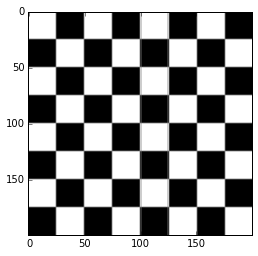

In [1]:
%matplotlib inline
from skimage import filters,io,data,color,feature,img_as_float

import numpy as np

img = img_as_float(data.checkerboard());
print img.shape
io.imshow(img)

####Add some noise

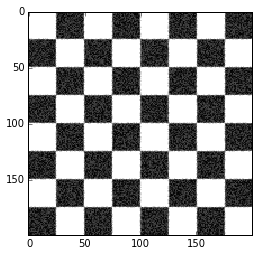

In [2]:
noisy = img + 0.6*img.std() * np.random.random(img.shape)
noisy = np.clip(noisy,0,1)
io.imshow(noisy)

####Remove the noise!

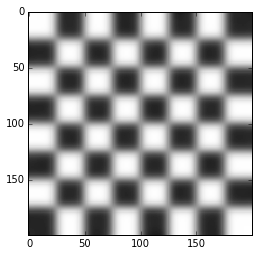

In [6]:
blurred = filters.gaussian_filter(noisy,2)
io.imshow(np.uint8(blurred*255))

####Lets get more complex

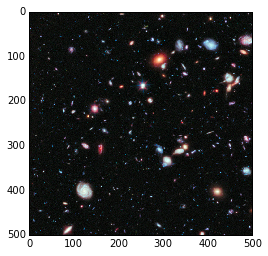

In [7]:
from math import sqrt
img_2 = data.hubble_deep_field()
img_2 = img_2[0:500,0:500]
io.imshow(img_2)

In [8]:
img_gray = color.rgb2gray(img_2)
blobs_log = feature.blob_log(img_gray, max_sigma=30, num_sigma=10, threshold=0.1)
blobs_log[:,2] = blobs_log[:,2] * sqrt(2)

blobs_dog = feature.blob_dog(img_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)


In [9]:
def disp_blob(blobs,title):
    from matplotlib import pyplot as plt
    fig,ax = plt.subplots(1,1)
    ax.set_title(title)
    ax.imshow(img_2, interpolation='nearest')
       

    for blob in blobs:        
        y, x, r = blob
        c = plt.Circle((x, y), r, color='yellow', linewidth=2, fill=False)
        ax.add_patch(c)

    return None

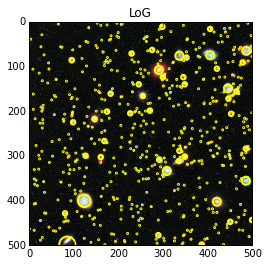

In [10]:
disp_blob(blobs_log,"LoG");

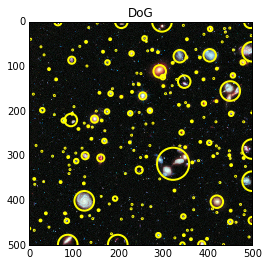

In [11]:
disp_blob(blobs_dog,"DoG");